In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

📉 Mean Squared Errors:
Linear Regression:   39.25
Polynomial (deg=3):  11.06
Lasso Regression:    11.05


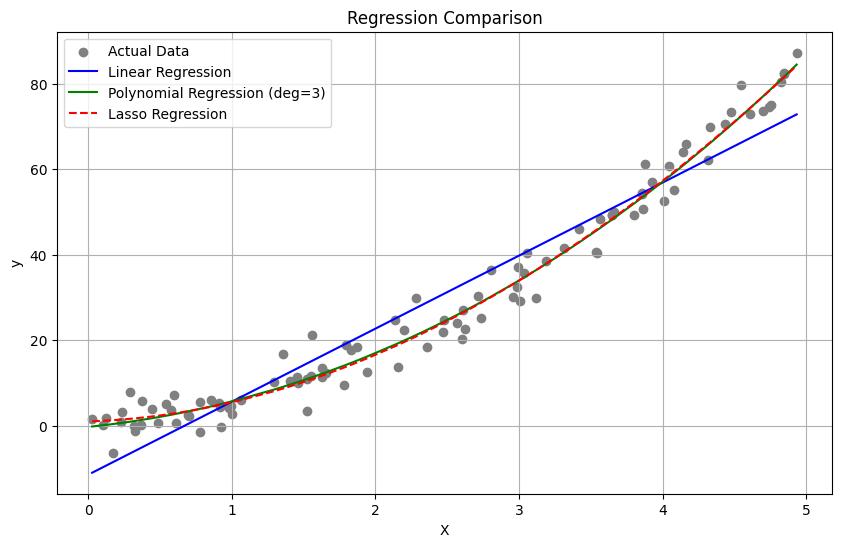

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data (quadratic with noise)
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 3 * X**2 + 2 * X + 1 + np.random.randn(100, 1) * 4  # y = 3x^2 + 2x + 1 + noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# b. Polynomial Regression (degree=3)
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)

# c. Lasso Regression with PolynomialFeatures
lasso_reg = make_pipeline(PolynomialFeatures(3), Lasso(alpha=0.1, max_iter=10000))
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Calculate MSE
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("📉 Mean Squared Errors:")
print(f"Linear Regression:   {mse_lin:.2f}")
print(f"Polynomial (deg=3):  {mse_poly:.2f}")
print(f"Lasso Regression:    {mse_lasso:.2f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label='Actual Data')
plt.plot(X, lin_reg.predict(X), color='blue', label='Linear Regression')
plt.plot(X, poly_reg.predict(X), color='green', label='Polynomial Regression (deg=3)')
plt.plot(X, lasso_reg.predict(X), color='red', linestyle='--', label='Lasso Regression')
plt.title("Regression Comparison")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


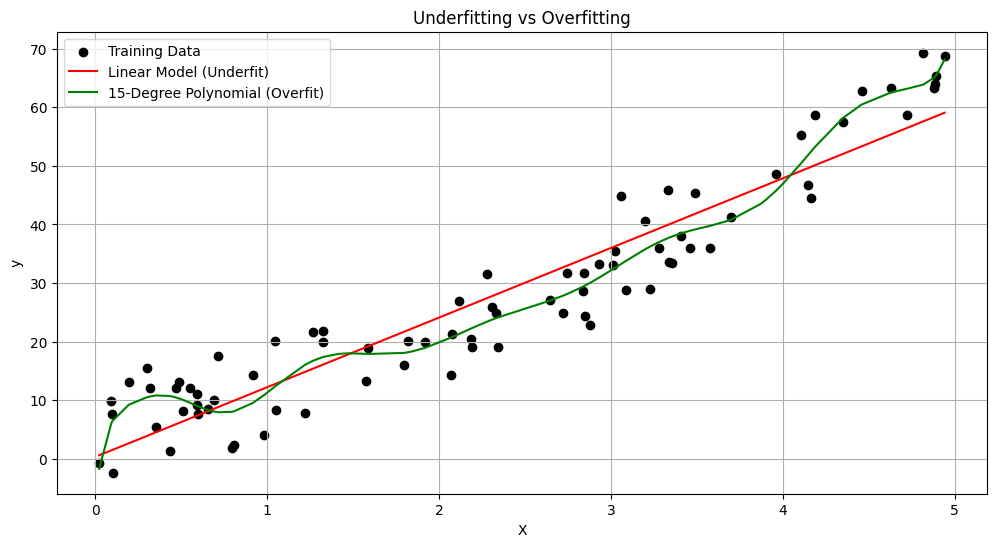

Linear Model MSE (Train): 37.302301270094425
Linear Model MSE (Test): 35.027301260793855
Polynomial Model MSE (Train): 20.749025203720684
Polynomial Model MSE (Test): 28.519651187576887


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# a. Generate quadratic data with noise
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = 2 * X**2 + 3 * X + 5 + np.random.randn(100, 1) * 5  # y = 2x^2 + 3x + 5 + noise

# b. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# c. Linear model (underfitting)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# d. High-degree polynomial (overfitting)
poly_model = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model.fit(X_train, y_train)

# e. Plotting
plt.figure(figsize=(12, 6))

# Training data
plt.scatter(X_train, y_train, color='black', label='Training Data')

# Linear model
plt.plot(X, linear_model.predict(X), color='red', label='Linear Model (Underfit)')

# Polynomial model
plt.plot(X, poly_model.predict(X), color='green', label='15-Degree Polynomial (Overfit)')

plt.title("Underfitting vs Overfitting")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# f. Performance
print("Linear Model MSE (Train):", mean_squared_error(y_train, linear_model.predict(X_train)))
print("Linear Model MSE (Test):", mean_squared_error(y_test, linear_model.predict(X_test)))
print("Polynomial Model MSE (Train):", mean_squared_error(y_train, poly_model.predict(X_train)))
print("Polynomial Model MSE (Test):", mean_squared_error(y_test, poly_model.predict(X_test)))


Predicted Salary for 5 years of experience: ₹50000.00


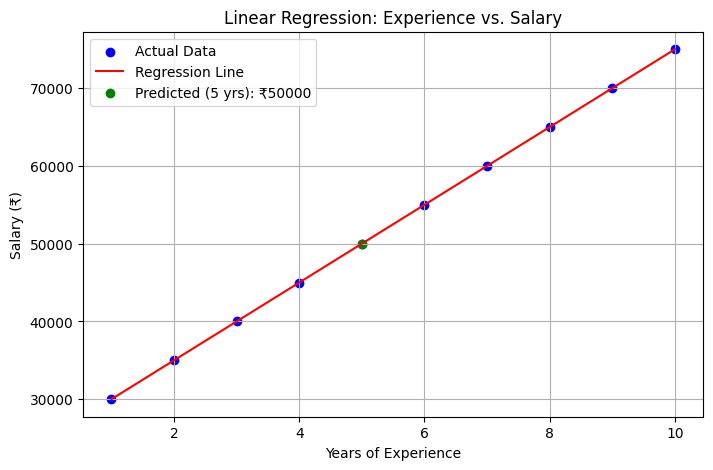

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# a. Dataset
years_experience = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
salaries = np.array([30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000])

# b. Fit the model
model = LinearRegression()
model.fit(years_experience, salaries)

# c. Predict salary for 5 years of experience
predicted_salary = model.predict([[5]])
print(f"Predicted Salary for 5 years of experience: ₹{predicted_salary[0]:.2f}")

# d. Visualize
plt.figure(figsize=(8, 5))
plt.scatter(years_experience, salaries, color='blue', label='Actual Data')
plt.plot(years_experience, model.predict(years_experience), color='red', label='Regression Line')
plt.scatter(5, predicted_salary, color='green', label=f'Predicted (5 yrs): ₹{int(predicted_salary[0])}')
plt.xlabel("Years of Experience")
plt.ylabel("Salary (₹)")
plt.title("Linear Regression: Experience vs. Salary")
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
from scipy.stats import ttest_ind

# Type I Error: Rejecting a true null hypothesis
# Two groups from same population (null is true)
group_A = np.random.normal(100, 10, 30)
group_B = np.random.normal(100, 10, 30)

t_stat1, p_value1 = ttest_ind(group_A, group_B)
print("Type I Error Simulation:")
print("p-value:", p_value1)
if p_value1 < 0.05:
    print("Type I Error likely: Rejected true null hypothesis\n")
else:
    print("Correctly failed to reject the true null hypothesis\n")


# Type II Error: Failing to reject a false null hypothesis
# Two groups with actual difference, but small sample or high variance hides it
group_C = np.random.normal(100, 20, 10)
group_D = np.random.normal(110, 20, 10)

t_stat2, p_value2 = ttest_ind(group_C, group_D)
print("Type II Error Simulation:")
print("p-value:", p_value2)
if p_value2 >= 0.05:
    print("Type II Error likely: Failed to reject a false null hypothesis\n")
else:
    print("Correctly rejected the false null hypothesis\n")


Type I Error Simulation:
p-value: 0.9272271783238606
Correctly failed to reject the true null hypothesis

Type II Error Simulation:
p-value: 0.11647861174917197
Type II Error likely: Failed to reject a false null hypothesis



In [5]:
from scipy.stats import ttest_rel

# Scores before and after a study program
before_scores = [60, 62, 65, 70, 68, 66, 64, 63, 61, 60]
after_scores = [65, 67, 70, 75, 72, 70, 68, 66, 64, 65]

# Paired t-test
t_stat, p_value = ttest_rel(after_scores, before_scores)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Result: Statistically significant improvement after the study program.")
else:
    print("Result: No statistically significant difference found.")


t-statistic: 16.516757511343577
p-value: 4.873794712301564e-08
Result: Statistically significant improvement after the study program.


Range: 40
Interquartile Range (IQR): 15.0
Variance: 154.0909090909091
Standard Deviation: 12.413335937245439


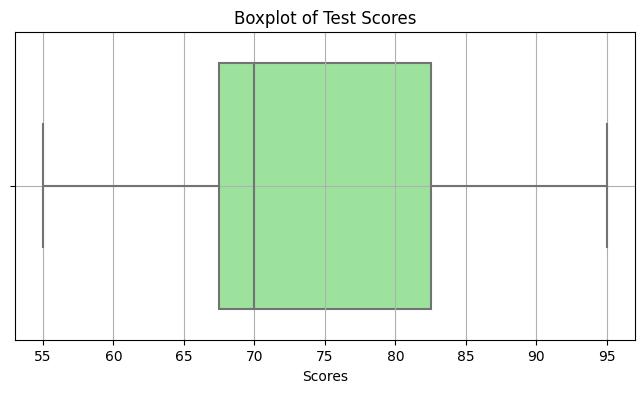

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
test_scores = [55, 60, 65, 70, 70, 70, 75, 80, 85, 90, 95]
scores_array = np.array(test_scores)

# Calculations
range_val = np.ptp(scores_array)
q1 = np.percentile(scores_array, 25)
q3 = np.percentile(scores_array, 75)
iqr = q3 - q1
variance = np.var(scores_array, ddof=1)
std_dev = np.std(scores_array, ddof=1)

# Print results
print("Range:", range_val)
print("Interquartile Range (IQR):", iqr)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

# Visualization - Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=scores_array, color='lightgreen')
plt.title("Boxplot of Test Scores")
plt.xlabel("Scores")
plt.grid(True)
plt.show()


With Outlier:
Mean: 21.88888888888889
Median: 12.0
Mode: 12

Without Outlier:
Mean: 12.125
Median: 12.0
Mode: 12


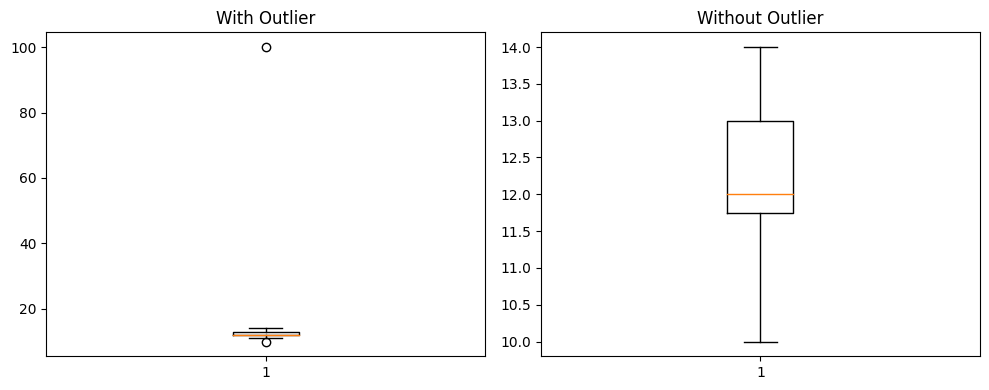

In [7]:
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

# a. Dataset with outliers
data_with_outliers = [10, 12, 13, 12, 11, 14, 13, 12, 100]  # 100 is an outlier

# b. Central tendency WITH outlier
mean_with = np.mean(data_with_outliers)
median_with = np.median(data_with_outliers)
mode_with = stats.mode(data_with_outliers)

print("With Outlier:")
print(f"Mean: {mean_with}")
print(f"Median: {median_with}")
print(f"Mode: {mode_with}")

# c. Remove outlier (e.g., values above 3rd quartile + 1.5*IQR)
q1 = np.percentile(data_with_outliers, 25)
q3 = np.percentile(data_with_outliers, 75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
filtered_data = [x for x in data_with_outliers if x <= upper_bound]

# d. Central tendency WITHOUT outlier
mean_without = np.mean(filtered_data)
median_without = np.median(filtered_data)
mode_without = stats.mode(filtered_data)

print("\nWithout Outlier:")
print(f"Mean: {mean_without}")
print(f"Median: {median_without}")
print(f"Mode: {mode_without}")

# e. Visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data_with_outliers)
plt.title("With Outlier")

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data)
plt.title("Without Outlier")

plt.tight_layout()
plt.show()


Mean: 69.33333333333333
Median: 67.5
Mode: 65


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


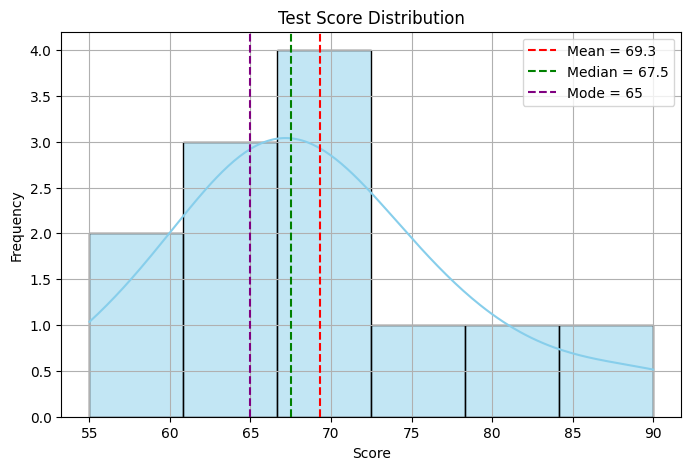

In [8]:
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample test scores
test_scores = [55, 67, 65, 72, 70, 68, 60, 65, 75, 80, 65, 90]

# a. Central tendency
mean_score = np.mean(test_scores)
median_score = np.median(test_scores)
mode_score = stats.mode(test_scores)

print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Mode: {mode_score}")

# b. Histogram
plt.figure(figsize=(8, 5))
sns.histplot(test_scores, bins=6, kde=True, color='skyblue')
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean = {mean_score:.1f}')
plt.axvline(median_score, color='green', linestyle='--', label=f'Median = {median_score}')
plt.axvline(mode_score, color='purple', linestyle='--', label=f'Mode = {mode_score}')
plt.title("Test Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
